# MILESTONE 2

IRFAN FAHMUDDIN (FTDS-011)

**OBJECTIVES**

memprediksi konsumsi energi listrik (kWh) dari stell pipe industry

In [65]:
# import library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle 

# DATA LOADING

In [2]:
df = pd.read_csv('Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [64]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,35030,35031,35032,35033,35034,35035,35036,35037,35038,35039
date,01/01/2018 00:15,01/01/2018 00:30,01/01/2018 00:45,01/01/2018 01:00,01/01/2018 01:15,01/01/2018 01:30,01/01/2018 01:45,01/01/2018 02:00,01/01/2018 02:15,01/01/2018 02:30,...,31/12/2018 21:45,31/12/2018 22:00,31/12/2018 22:15,31/12/2018 22:30,31/12/2018 22:45,31/12/2018 23:00,31/12/2018 23:15,31/12/2018 23:30,31/12/2018 23:45,31/12/2018 00:00
Usage_kWh,3.17,4.0,3.24,3.31,3.82,3.28,3.6,3.6,3.28,3.78,...,3.42,3.42,3.24,3.67,3.82,3.85,3.74,3.78,3.78,3.67
Lagging_Current_Reactive.Power_kVarh,2.95,4.46,3.28,3.56,4.5,3.56,4.14,4.28,3.64,4.72,...,0.0,0.0,3.38,4.43,4.54,4.86,3.74,3.17,3.06,3.02
Leading_Current_Reactive_Power_kVarh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.36,13.07,0.22,0.0,0.0,0.0,0.0,0.07,0.11,0.07
CO2(tCO2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lagging_Current_Power_Factor,73.21,66.77,70.28,68.09,64.72,67.76,65.62,64.37,66.94,62.51,...,100.0,100.0,69.2,63.8,64.38,62.1,70.71,76.62,77.72,77.22
Leading_Current_Power_Factor,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,24.8,25.31,99.77,100.0,100.0,100.0,100.0,99.98,99.96,99.98
NSM,900,1800,2700,3600,4500,5400,6300,7200,8100,9000,...,78300,79200,80100,81000,81900,82800,83700,84600,85500,0
WeekStatus,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,...,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday,Weekday
Day_of_week,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,...,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday


In [4]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Tidak ada missing values pada dataset ini dan untuk kolom date perlu diubah kedalam datetime

In [5]:
# copy data
dfc = df.copy()

In [6]:
# ubah kolom date ke datetime
dfc['date'] = pd.to_datetime(dfc['date'], format ="%d/%m/%Y %H:%M")


In [7]:
# cek data kembali
dfc.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [8]:
# rename kolom 2 dan 3
dfc.rename(columns={'Lagging_Current_Reactive.Power_kVarh':'Lagging_CRV_kVarh',
                        'Leading_Current_Reactive_Power_kVarh':'Leading_CRV_kVarh'}, inplace= True)

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          35040 non-null  datetime64[ns]
 1   Usage_kWh                     35040 non-null  float64       
 2   Lagging_CRV_kVarh             35040 non-null  float64       
 3   Leading_CRV_kVarh             35040 non-null  float64       
 4   CO2(tCO2)                     35040 non-null  float64       
 5   Lagging_Current_Power_Factor  35040 non-null  float64       
 6   Leading_Current_Power_Factor  35040 non-null  float64       
 7   NSM                           35040 non-null  int64         
 8   WeekStatus                    35040 non-null  object        
 9   Day_of_week                   35040 non-null  object        
 10  Load_Type                     35040 non-null  object        
dtypes: datetime64[ns](1), float6

kolom date telah berubah kedalam format datetime

## EDA

1. Ingin melihat bagaimana daya terpakai berdasarkan bulan

In [10]:
# menambahkan kolom bulan

dfc['month']= dfc['date'].dt.month

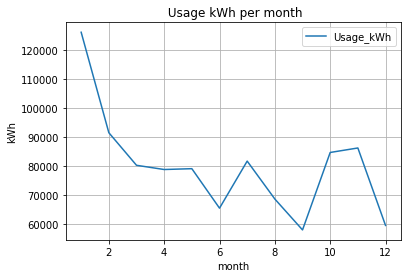

In [11]:
dfc.groupby('month').sum()[['Usage_kWh']].plot()
plt.title(' Usage kWh per month')
plt.ylabel('kWh')
plt.rcParams["figure.figsize"] = (15,8)
plt.grid()


Berdasarkan plot diatas, kita menjadi tahu bahwa konsumnsi listrik pada bulan pertama sangat tinggi dan kemudian mengalami penurunan yang signifikan pada bulan setelahnya. terdapat fluktuatif nilai disana dan pada bulan 9 dan 12 menjadi titik terendah konsumsi listrik.

Kemudian kita akan cek bagaimana konsumsi listrik berdasarkan hari


<AxesSubplot:xlabel='Day_of_week'>

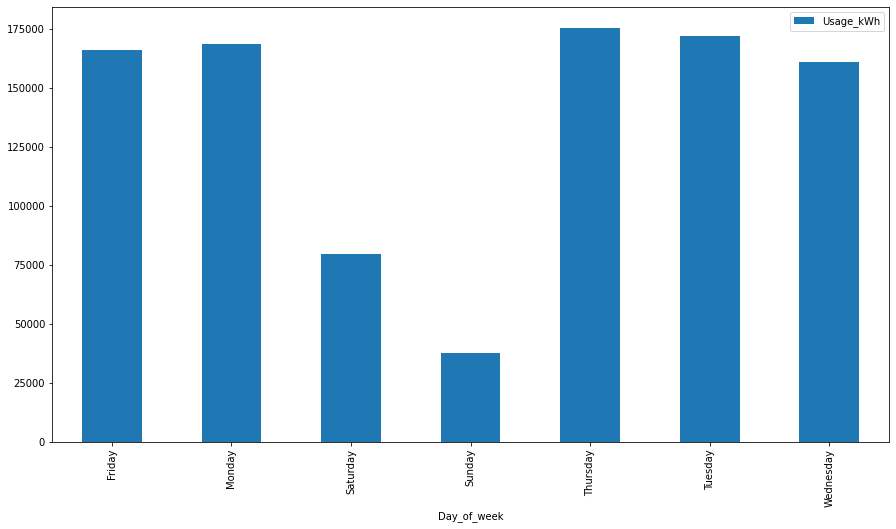

In [12]:
EDA_1 = dfc.groupby('Day_of_week').sum()[['Usage_kWh']].plot(kind = 'bar')
EDA_1

Kita akan lihat pada hari senin hingga jumat. pada hari-hari tersebut, jumlah konsumsi listrik tidak jauh berbeda jumlahnya. Konsumsi listrik tertinggi kita bisa lihat ada pada hari Kamis/thursday

2. bagaimana rerata konsumsi listrik tiap load type

<AxesSubplot:xlabel='Load_Type'>

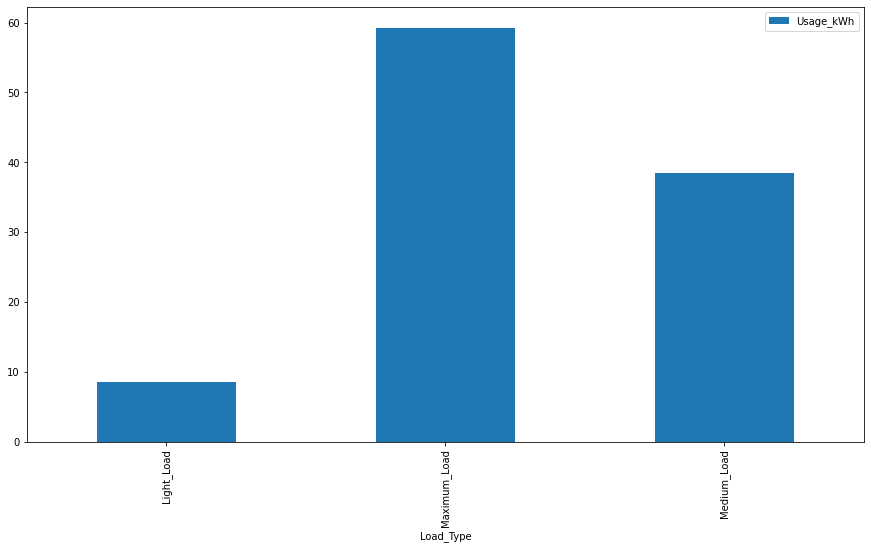

In [13]:
EDA_2 = dfc.groupby('Load_Type').mean()[['Usage_kWh']].plot(kind = 'bar')
EDA_2

Berdasarkan data diatas kitaa ketahui bahwa rerata untuk tiap tipe load. untuk medium load ini bisa dikatakan hampir setengah dari maximum load sedangkan untuk light load ini tidak ada setengvah dari medium load. dapat dikatakan pada medium load ini titik data terbanyak ada di rentang atas tipe tersebut atau pada light load banyak titik data yang berada pada rentang bawahnya sehingga menghasilkan rerata yang tidak setengah dari medium load

3. Bagaimana konsumsi listrik berdasarkan weekstatus

<AxesSubplot:xlabel='WeekStatus'>

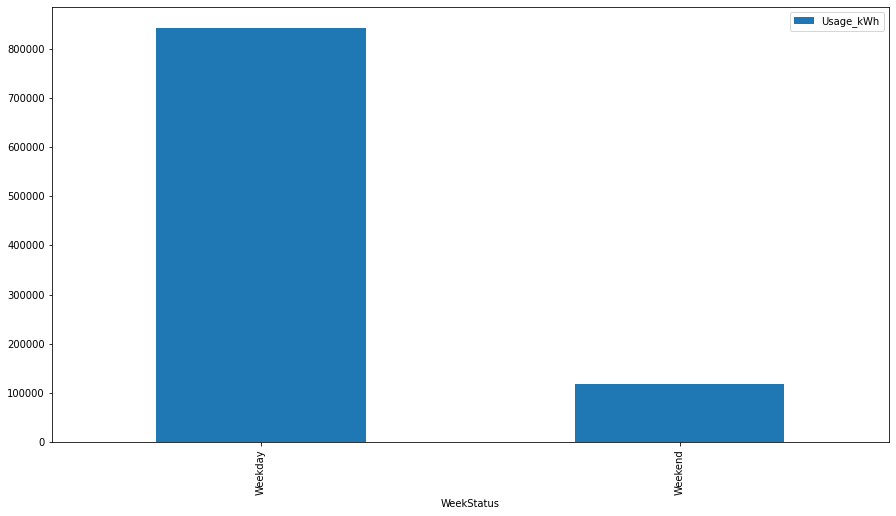

In [14]:
EDA_3 = dfc.groupby('WeekStatus').sum()[['Usage_kWh']].plot(kind = 'bar')
EDA_3

Berdasarkan grafik, konsumsi listrik pada saat weekdays jauh lebih tinggi dari weekend, hal ini wajar karena pada weekdays tentunya banyak sekali mesin yang bekerja sedangkan pada weekend konsumsi listrik kecil karena tidak ada mesin bekerja

4. Bagaimanakah pengaruh kvarh lagging current dan leading current terhadap konsumsi listrik?

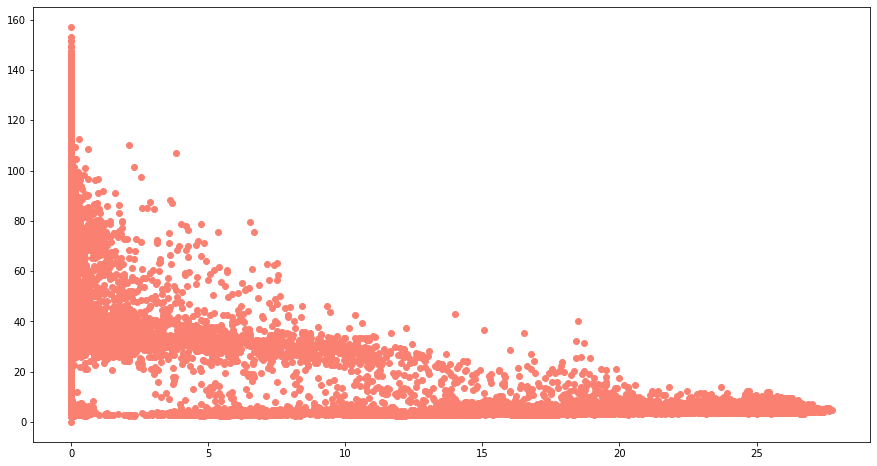

In [15]:
# plotting leading_CRV_kvarh terhadap usage kWh
plt.scatter(dfc.Leading_CRV_kVarh, 
            dfc.Usage_kWh, 
            c="salmon") 


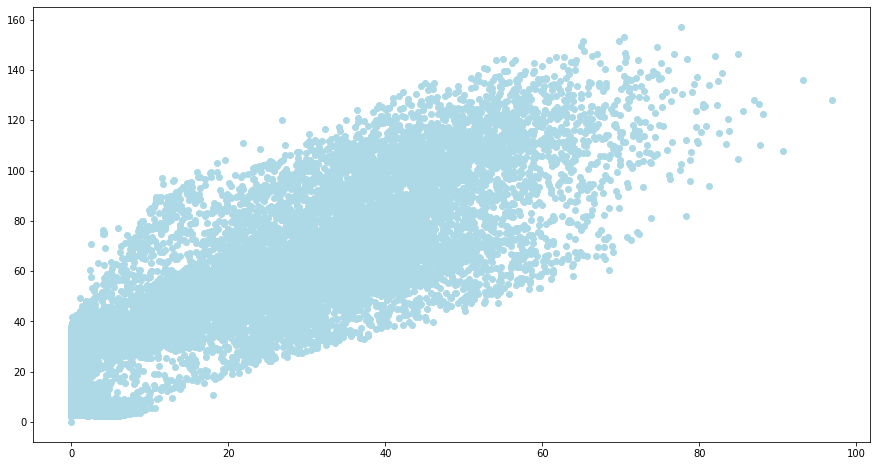

In [16]:
# plotting lagging_CRV_kvarh terhadap usage kWh
plt.scatter(dfc.Lagging_CRV_kVarh, 
            dfc.Usage_kWh, 
            c="lightblue") 

Berdasarkan 2 gambar diatas, leading current power kvarh ini tidak terlalu berkorelasi dengan usage kwh sehingga tingkat konsumsi listrik tidak mempengaruhi kvarh leading current dan sebaaliknyaa. namun, untuk lagging current power kvarh terlihat memiliki korelasi denga konsumsi listrik. hal ini bisa kita lihat dengan grafik yang membentuk garis diagonal sehingga ketika konsumsi listirik naik, ada kecenderungan lagging current kvarh juga naik.

5. Terjadinya laagging current per harinya bagaimana?

<AxesSubplot:xlabel='Day_of_week'>

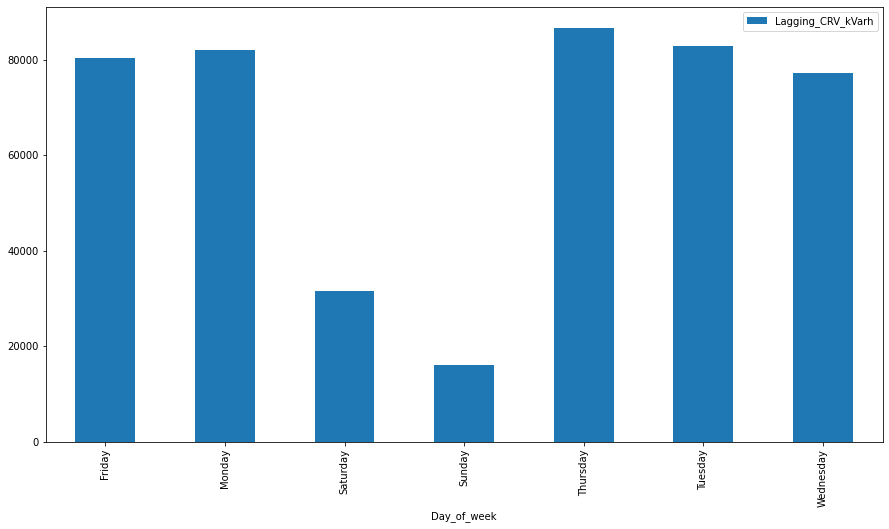

In [17]:
EDA_5 = dfc.groupby('Day_of_week').sum()[['Lagging_CRV_kVarh']].plot(kind = 'bar')
EDA_5

Berdasaarkan grafik diatas, terlihat bahwa hsailnya sangat mirip dengan grafik antara konsumsi listrik perhartinya sehingga kita yakin bahwa lagging current ini berkorelasi tinggi dengan tingkat konsumsi listrik.

<AxesSubplot:>

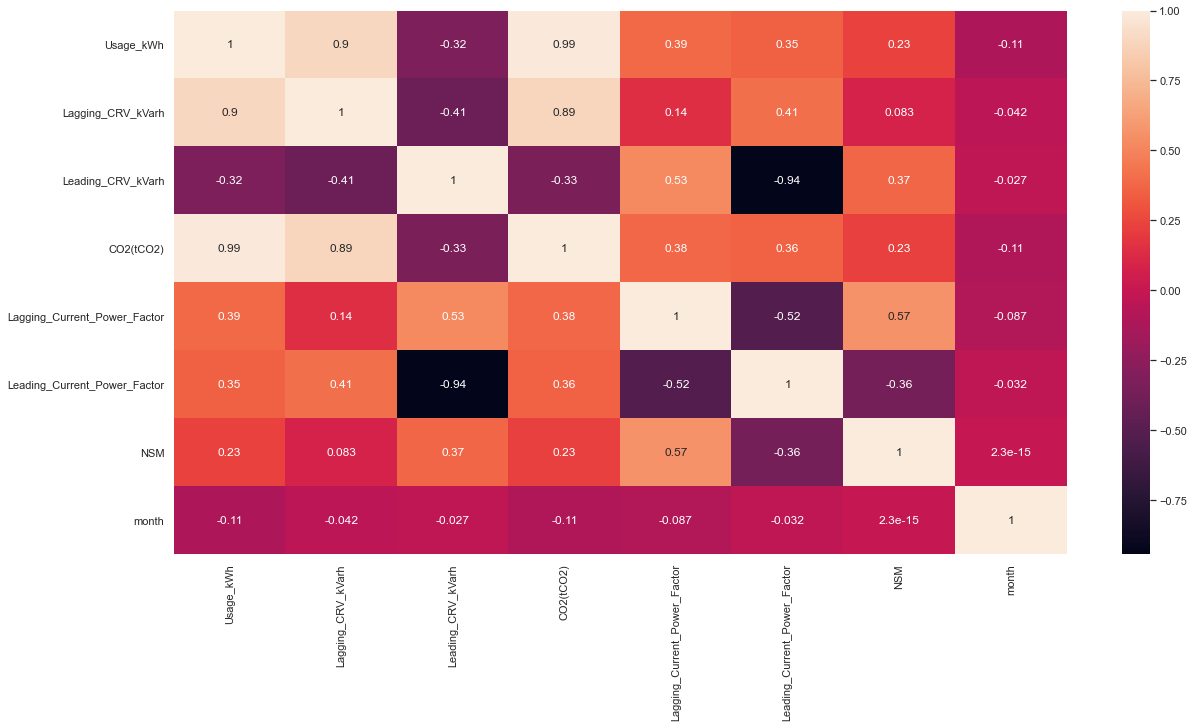

In [18]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(dfc.corr(),annot=True)

Ploting heatmap diatas menunjukkan korelasi antara fitur dari dataset ini. ketika nilainya mendekati 1 maka korelasi yang terbentuk semakin tinggi dan begitu juga dengan sebaliknya. Contohnya pada korelasi antara Usage_kWh dengan leading current power factor memiliki korelasi 0.35 yang artinya keduanya memiliki korelasi yang cukup tinggi sebesar 0.35 dari 1

## DATA PREPROCESSING

In [19]:
# copy data kembali
datacopy= dfc.copy()

In [20]:
# drop kolom date
datacopy.drop(columns = 'date', inplace = True)

In [21]:
datacopy.head()

,Usage_kWh,Lagging_CRV_kVarh,Leading_CRV_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1


In [22]:
# cek info data
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Usage_kWh                     35040 non-null  float64
 1   Lagging_CRV_kVarh             35040 non-null  float64
 2   Leading_CRV_kVarh             35040 non-null  float64
 3   CO2(tCO2)                     35040 non-null  float64
 4   Lagging_Current_Power_Factor  35040 non-null  float64
 5   Leading_Current_Power_Factor  35040 non-null  float64
 6   NSM                           35040 non-null  int64  
 7   WeekStatus                    35040 non-null  object 
 8   Day_of_week                   35040 non-null  object 
 9   Load_Type                     35040 non-null  object 
 10  month                         35040 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.9+ MB


### Data inference

In [23]:
# membuat data inference
data_inf = datacopy.sample(10, random_state=28)
data_inf

,Usage_kWh,Lagging_CRV_kVarh,Leading_CRV_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month
21863,28.08,0.14,3.10,0.01,100.00,99.40,64800,Weekday,Thursday,Medium_Load,8
8262,3.60,4.14,0.00,0.00,65.62,100.00,6300,Weekday,Wednesday,Light_Load,3
30211,3.85,0.00,18.76,0.00,100.00,20.10,61200,Weekend,Sunday,Light_Load,11
5989,3.96,0.00,22.21,0.00,100.00,17.55,34200,Weekend,Sunday,Light_Load,3
25679,2.59,0.00,6.19,0.00,100.00,38.60,43200,Weekday,Tuesday,Light_Load,9
26716,2.88,5.76,0.00,0.00,44.72,100.00,26100,Weekend,Saturday,Light_Load,10
6214,57.96,4.39,1.44,0.03,99.71,99.97,63900,Weekday,Tuesday,Medium_Load,3
25627,3.20,6.34,0.00,0.00,45.06,100.00,82800,Weekday,Monday,Light_Load,9
8209,6.91,0.00,25.20,0.00,100.00,26.44,45000,Weekday,Tuesday,Medium_Load,3
3251,41.04,0.83,1.22,0.02,99.98,99.96,75600,Weekend,Saturday,Medium_Load,2


In [24]:
# menghilangkan data inference pada data secara keseluruhan

data_train_test= datacopy.drop(data_inf.index)
data_train_test

,Usage_kWh,Lagging_CRV_kVarh,Leading_CRV_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load,1
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load,1
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load,1
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load,1
...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,12
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,12
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,12
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load,12


In [25]:
# reset index

data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace = True)

### Splitting data set

In [26]:
# split between X dan y

X = data_train_test.drop(['Usage_kWh'], axis = 1)
y= data_train_test['Usage_kWh']

In [27]:
# split train-set and test-set


X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state=24)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (29775, 10)
test size: (5255, 10)


### HANDLING OUTLIER

cek distribusi datanya

In [28]:
# Function to create histogram and boxplot.

def cek_distribusi(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

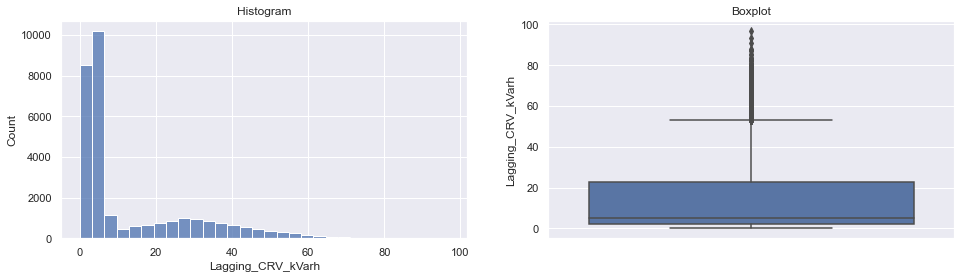

In [29]:
# plot untuk lagging_CRV_kvarh

cek_distribusi(X_train,'Lagging_CRV_kVarh')

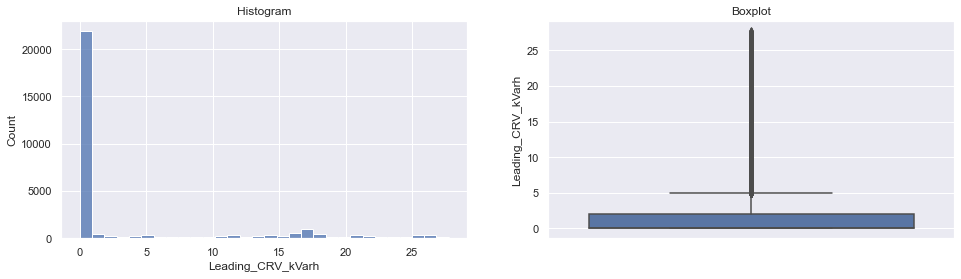

In [30]:
# plot untuk Leading_CRV_kVarh

cek_distribusi(X_train,'Leading_CRV_kVarh')

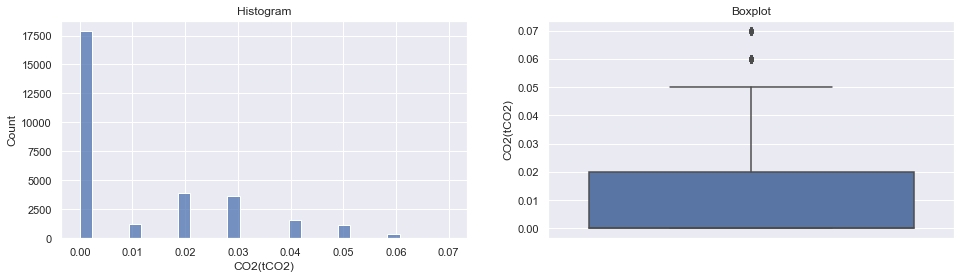

In [31]:
# plot untuk CO2(tCO2)

cek_distribusi(X_train,'CO2(tCO2)')

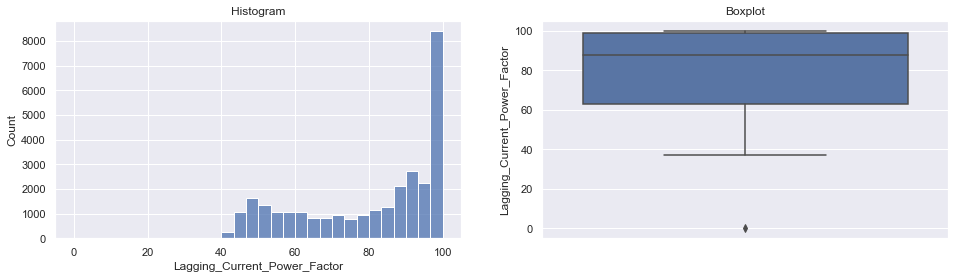

In [32]:
# plot untuk Lagging_Current_Power_Factor

cek_distribusi(X_train,'Lagging_Current_Power_Factor')

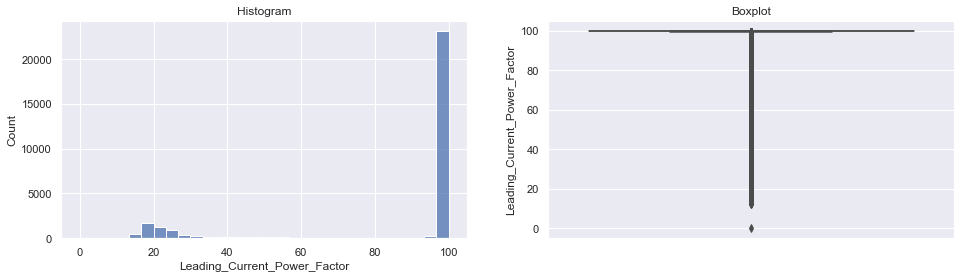

In [33]:
# plot untuk Leading_Current_Power_Factor

cek_distribusi(X_train,'Leading_Current_Power_Factor')

In [34]:
datacopy.skew()

Usage_kWh                       1.197394
Lagging_CRV_kVarh               1.437899
Leading_CRV_kVarh               1.734314
CO2(tCO2)                       1.149355
Lagging_Current_Power_Factor   -0.606126
Leading_Current_Power_Factor   -1.511984
NSM                             0.000000
month                          -0.010457
dtype: float64

Berdasarkan analisa yang dilakukan sebelumnya, nilai outlier yang ditunjukkan pada grafik masih kategori wajar sehingga kita tidak akan melakukan trimming atau crapping pada data outlier yang ada

## FEATURE SCALING

In [35]:
# mendefinisikan mana kolom yang berisi number maupun categorical
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print ('Kolom yang merupakan number adalah: ',num_columns)

print ('\n Kolom yang merupakan categorical adalah: ',cat_columns)

Kolom yang merupakan number adalah:  ['Lagging_CRV_kVarh', 'Leading_CRV_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'month']

 Kolom yang merupakan categorical adalah:  ['WeekStatus', 'Day_of_week', 'Load_Type']


In [36]:
# buat variabel baru untuk kategorikal dan numerik

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

Karena distribusi data yang ada skew, maka akan digunakan minmaxscaller untuk proses scaling.

In [37]:
# feature scaling
scaler = MinMaxScaler()

# lakukan fit scaling untuk tiap data yg skew dan normal
scaler.fit(X_train_num)

# lakukan transform scaling untuk tiap data yg skew dan normal
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled = scaler.transform(X_train_num)

## FEATURE ENCODING

Untuk proses encoding, akan digunakan 2 tipe encoder untuk data ordinal yaitu kolom load type karena tiap nilai menggambarkan tingkatan dari peanggunaan listrik

In [38]:
# pisahkan data kategorikal terhadap encodernya

X_train_cat_OHE = X_train_cat[['WeekStatus', 'Day_of_week']]
X_train_cat_ORD = X_train_cat[['Load_Type']]

X_test_cat_OHE = X_test_cat[['WeekStatus', 'Day_of_week']]
X_test_cat_ORD = X_test_cat[['Load_Type']]

In [39]:
# feature encoding

encoderOHE = OneHotEncoder()
encoderORD = OrdinalEncoder()

# lakukan fit encoding untuk tiap data
encoderOHE.fit(X_train_cat_OHE)
encoderORD.fit(X_train_cat_ORD)

# lakukan transform encoding untuk tiap data
X_test_cat_encoded_OHE = encoderOHE.transform(X_test_cat_OHE).toarray()
X_test_cat_encoded_ORD = encoderORD.transform(X_test_cat_ORD)

X_train_cat_encoded_OHE = encoderOHE.transform(X_train_cat_OHE).toarray()
X_train_cat_encoded_ORD = encoderORD.transform(X_train_cat_ORD)

In [40]:
# concat data kategorikal

X_train_encoded = np.concatenate([X_train_cat_encoded_OHE, X_train_cat_encoded_ORD], axis = 1)
X_test_encoded = np.concatenate([X_test_cat_encoded_OHE, X_test_cat_encoded_ORD], axis =1)

In [41]:
# concate columns semuanya yg cat dan num

X_train_final = np.concatenate([X_train_num_scaled, X_train_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_encoded], axis =1)

## MODEL DEFINITION

untuk mendapatkan pemodelan terbaik, dilakukan trial and error terhadap beberapa algortitma pemodelan seperti menggunakan linearregression, ridgeregression, dan randomforestregressor. Dari beberapa algoritma yang dicoba, ditemukan bahwa model denga randomforestregressor menjadi yang terbaik dan diaplikasikan

In [67]:
model = RandomForestRegressor()
model_ridge = Ridge()
model_linreg = LinearRegression()
model_SVR = SVR()

## MODEL TRAINING

In [68]:
model.fit(X_train_final,y_train)
model_ridge.fit(X_train_final,y_train)
model_linreg.fit(X_train_final,y_train)
model_SVR.fit(X_train_final,y_train)

SVR()

## MODEL EVALUATION

In [70]:
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict (X_test_final)

y_pred_train_R = model_ridge.predict(X_train_final)
y_pred_test_R = model_ridge.predict (X_test_final)

y_pred_train_linreg = model_linreg.predict(X_train_final)
y_pred_test_linreg = model_linreg.predict (X_test_final)

y_pred_train_SVR = model_SVR.predict(X_train_final)
y_pred_test_SVR = model_SVR.predict (X_test_final)

In [45]:
# evaluate model using MAE

print('error train-set: ', mean_absolute_error(y_train, y_pred_train))
print('error test-set: ', mean_absolute_error(y_test, y_pred_test))

error train-set:  0.12545147607052828
error test-set:  0.30958089438629827


In [46]:
# evaluiate model using MSE

print('error train-set: ', mean_squared_error(y_train, y_pred_train))
print('error test-set: ', mean_squared_error(y_test, y_pred_test))

error train-set:  0.14428352072376086
error test-set:  0.7789337079391051


In [47]:
# evaluiate model using r2 score

print('error train-set: ', r2_score(y_train, y_pred_train))
print('error test-set: ', r2_score(y_test, y_pred_test))

error train-set:  0.9998710332805559
error test-set:  0.9993033025790661


Berdasarkan hasil r2 scorenya, model ini sangat baik karena mendapatkan hasil 0,99 dari 1. Nilai ini hampir mendekati sempurna serta pada error secara MAE maupun MSE sangat kecil yaitu sekitar 0.3 dan 0.7. Artinya ketika melakukan prediksi akan memiliki error sebesar 0.7 dari nilai sesungguhnya. Nilai error tersebut masih bagus karena sangat kecil dan wajar jika error yang terbentuk mendapatkan nilai dibawah 1.

RIDGE

In [71]:
# evaluate model using MAE

print('error train-set: ', mean_absolute_error(y_train, y_pred_train_R))
print('error test-set: ', mean_absolute_error(y_test, y_pred_test_R))

error train-set:  2.6299045452814642
error test-set:  2.576519815836868


In [72]:
# evaluiate model using MSE

print('error train-set: ', mean_squared_error(y_train, y_pred_train_R))
print('error test-set: ', mean_squared_error(y_test, y_pred_test_R))

error train-set:  22.35403416860909
error test-set:  18.283461020605344


In [73]:
# evaluiate model using r2 score

print('error train-set: ', r2_score(y_train, y_pred_train_R))
print('error test-set: ', r2_score(y_test, y_pred_test_R))

error train-set:  0.9800190178434404
error test-set:  0.9836468238452488


LINREG

In [74]:
# evaluate model using MAE

print('error train-set: ', mean_absolute_error(y_train, y_pred_train_linreg))
print('error test-set: ', mean_absolute_error(y_test, y_pred_test_linreg))

error train-set:  2.623639858837112
error test-set:  2.569536616912464


In [75]:
# evaluiate model using MSE

print('error train-set: ', mean_squared_error(y_train, y_pred_train_linreg))
print('error test-set: ', mean_squared_error(y_test, y_pred_test_linreg))

error train-set:  22.353065638450282
error test-set:  18.251093575244326


In [76]:
# evaluiate model using r2 score

print('error train-set: ', r2_score(y_train, y_pred_train_linreg))
print('error test-set: ', r2_score(y_test, y_pred_test_linreg))

error train-set:  0.9800198835567016
error test-set:  0.9836757740825738


SVR

In [77]:
# evaluate model using MAE

print('error train-set: ', mean_absolute_error(y_train, y_pred_train_SVR))
print('error test-set: ', mean_absolute_error(y_test, y_pred_test_SVR))

error train-set:  2.3475461196053122
error test-set:  2.304945741106962


In [78]:
# evaluiate model using MSE

print('error train-set: ', mean_squared_error(y_train, y_pred_train_SVR))
print('error test-set: ', mean_squared_error(y_test, y_pred_test_SVR))

error train-set:  22.990609955952397
error test-set:  19.59157047425688


In [79]:
# evaluiate model using r2 score

print('error train-set: ', r2_score(y_train, y_pred_train_SVR))
print('error test-set: ', r2_score(y_test, y_pred_test_SVR))

error train-set:  0.9794500194536077
error test-set:  0.9824768186530617


## HYPERPARAMETER TUNING USING GREIDSEARCHCV

In [48]:
# definikan parameter yang akan dicoba pada randomforest

param_grid = {"n_estimators": [10,40,60,80,100],
              "max_depth": [6,7,8,9,10,11,12,13],
              "max_features": ['sqrt','log2']
              }

grid_cv = GridSearchCV(model, param_grid, cv=5)

# fit parameter kedalam data
grid_cv.fit(X_train_final,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 40, 60, 80, 100]})

In [49]:
# print hasil untuk best score
print("Best Score untuk model :{}".format(grid_cv.best_score_))
print("Best Hyperparameters untuk:\n{}".format(grid_cv.best_params_))

Best Score untuk model :0.9947712128624024
Best Hyperparameters untuk:
{'max_depth': 13, 'max_features': 'log2', 'n_estimators': 60}


Hasil model dengan best parameter akan dieval dengan MAE, MSE, dan r2 score dan juga akan diujicobakan kedalam data inference

In [50]:
# membuat model baru dengan best parameter

best_model = RandomForestRegressor(max_depth= 13, max_features= 'sqrt', n_estimators= 100)

In [51]:
best_model.fit(X_train_final,y_train)

RandomForestRegressor(max_depth=13, max_features='sqrt')

In [52]:
y_pred_train_best = best_model.predict(X_train_final)
y_pred_test_best = best_model.predict (X_test_final)

In [53]:
# evaluate model using MAE

print('error train-set: ', mean_absolute_error(y_train, y_pred_train_best))
print('error test-set: ', mean_absolute_error(y_test, y_pred_test_best))

error train-set:  1.0738080616095258
error test-set:  1.2727256095135484


In [54]:
# evaluiate model using MSE

print('error train-set: ', mean_squared_error(y_train, y_pred_train_best))
print('error test-set: ', mean_squared_error(y_test, y_pred_test_best))

error train-set:  3.824615575827369
error test-set:  5.326700000900724


In [55]:
# evaluiate model using r2 score

print('error train-set: ', r2_score(y_train, y_pred_train_best))
print('error test-set: ', r2_score(y_test, y_pred_test_best))

error train-set:  0.9965813966731956
error test-set:  0.9952356688189358


Berdasarkan hasil tuning hyperparameter, dapat dilihat bahwa secara r2 skornya sangat baik karena mendekati 1. kemudian absolut error yang dihasilkan terbilang sangat kecil yaitu dikisaran 1, 06 serta untuk MSE menghasilkan nilai 5,3. namun, nilai ini tidak lebih baik dari model sebelum melakukan tuning. kemungkinannya dalah pada menentukan parameter grid ini, max-depth belum mencapai  nilai yang maksimal karena ketika melakukan trial nilai max_depth, nilai terbaik selalu yg paling besar. Dapat disimpulkan bahwa max_depth pada parameter grid belum menyentuh titik maksimal.

## MODEL INFERENCE TEST

In [56]:
# split data
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [57]:
# feature scaling 
scaler = MinMaxScaler()

# lakukan fit untuk data
scaler.fit(X_train_num)

# lakukan transform scaling untuk tiap data
data_inf_num_scaled = scaler.transform(data_inf_num)

In [58]:
# feature encoding

# pisahkan data kategorikal terhadap encodernya

data_inf_cat_OHE = data_inf_cat[['WeekStatus', 'Day_of_week']]
data_inf_cat_ORD = data_inf_cat[['Load_Type']]


encoderOHE = OneHotEncoder()
encoderORD = OrdinalEncoder()

# lakukan fit encoding untuk tiap data
encoderOHE.fit(X_train_cat_OHE)
encoderORD.fit(X_train_cat_ORD)

# lakukan transform encoding untuk tiap data
data_inf_cat_encoded_OHE = encoderOHE.transform(data_inf_cat_OHE).toarray()
data_inf_cat_encoded_ORD = encoderORD.transform(data_inf_cat_ORD)

# concat data kategorikal
data_inf_encoded = np.concatenate([data_inf_cat_encoded_OHE, data_inf_cat_encoded_ORD], axis = 1)

In [59]:
# concate the data

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_encoded], axis = 1)

In [60]:
# predict data inference

y_pred_inf = model.predict(data_inf_final)

In [61]:
# konversi data kedalam dataframe

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns = ['Usage kWh Prediction'])

In [62]:
# concat data sebelumnya dengaan data aslinya
pd.concat([data_inf['Usage_kWh'],y_pred_inf_df], axis = 1)

,Usage_kWh,Usage kWh Prediction
0,28.08,29.5690
1,3.60,3.5893
2,3.85,3.8183
3,3.96,4.0308
4,2.59,2.6664
5,2.88,2.8899
6,57.96,59.2804
7,3.20,3.1965
8,6.91,7.0428
9,41.04,41.0953


## KESIMPULAN

Model dengan randomforestregressor sangat baik untuk memprediksi tingkat konsumsi listrik di suatu industri. Model ini menghasilkan r2 skor yang hampir sempurna yaitu 0,99. kemudian MAE yang dihasilkan sebesar 0,3 dan MSE sebesar 0,7. Nilai ini sangat baik karena dapat dikatakan prediksi yang dihasilkan memiliki error atau meleset sebesar 0,7 dari prediksi sesungguhnya. Dapat dilihat pada uji data inference baris terakhir, nilai prediksi meleset hanya 0,12 dari nilai aslinya yang mana hasil ini menunjukkan prediksi yang sangat baik.

# MAKING PIPELINE

In [63]:
data2.head()

NameError: name 'data2' is not defined

In [ ]:
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
categorical_transformer_ORD = Pipeline(steps=[('encoder_ORD', OrdinalEncoder())])
categorical_transformer_OHE = Pipeline(steps=[('encoder_OHE', OneHotEncoder())])

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features_ORD = ['WeekStatus', 'Day_of_week']
categorical_features_OHE = ['Load_Type']


preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical_ORD', categorical_transformer_ORD, categorical_features_ORD),
    ('categorical_OHE', categorical_transformer_OHE, categorical_features_OHE),
]) 


In [ ]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor())
           ])

In [ ]:
rf_model = pipeline.fit(X_train,y_train)


In [ ]:
print (rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Lagging_CRV_kVarh', 'Leading_CRV_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'month'],
      dtype='object')),
                                                 ('categorical_ORD',
                                                  Pipeline(steps=[('encoder_ORD',
                                                                   OrdinalEncoder())]),
                                                  ['WeekStatus',
                                                   'Day_of_week']),
                                                 ('categorical_OHE',
                                                  Pipeline(steps=[('enc

In [ ]:
predictions = rf_model.predict(X_test)
print (r2_score(y_test, predictions))

0.9992667664658089


In [ ]:
# model saving

with open('model_steel.pkl', 'wb') as file_1:
    pickle.dump(pipeline, file_1)

In [ ]:
with open('model_steel.pkl','rb') as file_1:
    model_steel = pickle.load(file_1)

In [ ]:
y_pred_inf_tes = model_steel.predict(data_inf)

In [ ]:
# konversi data kedalam dataframe

y_pred_inf_tesdf = pd.DataFrame(y_pred_inf_tes, columns = ['Usage kWh Prediction'])

In [ ]:
pd.concat([data_inf['Usage_kWh'],y_pred_inf_df,y_pred_inf_tesdf], axis = 1)

,Usage_kWh,Usage kWh Prediction,Usage kWh Prediction
0,28.08,29.5086,29.6176
1,3.60,3.5900,3.5909
2,3.85,3.7665,3.8133
3,3.96,3.9664,3.9826
4,2.59,2.6584,2.6257
5,2.88,2.8871,2.8894
6,57.96,59.7094,59.8598
7,3.20,3.1938,3.1911
8,6.91,7.0201,7.0448
9,41.04,41.2998,41.3471
